# Deep Learning Project.
# "Brain Tumor Detection" 


Preprocessing your dataset is a crucial step for training an effective Deep Learning model for brain tumor detection. Here’s a general workflow you can follow:


# Preprocessing 

# 1. Data Collection
Ensure you have a sufficient amount of labeled brain MRI images. Common datasets include:

BRATS (Brain Tumor Segmentation): Available through the Medical Decathlon or the BRATS challenges.
Kaggle Datasets: Various MRI datasets available on Kaggle. https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [1]:
# pip install tensorflow


In [2]:
# pip install opencv-python
# pip install opencv-python-headless

# 2. Data Preprocessing Steps
A. Loading the Data
Use libraries like pydicom for DICOM files, SimpleITK, or nibabel for NIfTI files to read medical images.

In [3]:
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [4]:
data_dir = 'Brain Tumor Data Set'

b. Resizing and Normalizing Images
Resizing: Resize all images to a consistent size (e.g., 224x224 pixels for DenseNet).
Normalization: Normalize pixel values to a range (e.g., 0 to 1).

In [5]:
def load_and_preprocess_image(img_path, img_size=(224, 224)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    img = cv2.resize(img, img_size)  # Resize image
    img = img / 255.0  # Normalize image
    return img

c. Data Load

data: List to store the image data.

labels: List to store the corresponding labels.

os.listdir(data_dir): Lists all directories (classes) in the dataset directory.

os.path.join: Joins directory names to form the full path.

load_and_preprocess_image: Loads and preprocesses each image.

data.append(img): Appends the preprocessed image to the data list.

labels.append(class_dir): Appends the label (class directory name) to the labels list.

np.array: Converts lists to numpy arrays.

In [6]:
data = []
labels = []

# Iterate over each subdirectory (class) in the main dataset directory
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate over each image file in the class directory
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if os.path.isfile(img_path):  # Check if it's a file
                img = load_and_preprocess_image(img_path)
                data.append(img)
                labels.append(class_name)
    else:
        print(f"{class_path} is not a directory.")

data = np.array(data)
labels = np.array(labels)


In [7]:
# data = []
# labels = []
# for class_dir in os.listdir(data_dir):
#     class_path = os.path.join(data_dir, class_dir)
#     for img_name in os.listdir(class_path):
#         img_path = os.path.join(class_path, img_name)
#         img = load_and_preprocess_image(img_path)
#         data.append(img)
#         labels.append(class_dir)

# data = np.array(data)
# labels = np.array(labels)


d. Data Augmentation
Use data augmentation techniques to artificially increase the size of your training dataset:

Rotation: Random rotations.

Flipping: Horizontal and vertical flips.

Zooming: Random zooms.

Brightness/Contrast Adjustments

In [8]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Fit the data generator on the data

In [10]:
datagen.fit(data.reshape(-1, 224, 224, 1))

e. Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


1. Verify Data Shape and Range

After loading and preprocessing the images, you can check the shape and range of your data array:

In [14]:
# Check shape of data
print("Shape of data array:", data.shape)

# Check range of pixel values
print("Min pixel value:", np.min(data))
print("Max pixel value:", np.max(data))


Shape of data array: (4600, 224, 224)
Min pixel value: 0.0
Max pixel value: 1.0


2. Visualize Sample Images

You can visualize a few sample images to visually confirm that the resizing and preprocessing were performed correctly:

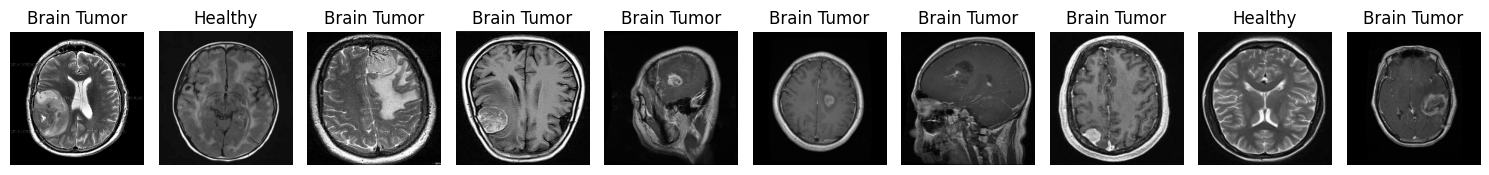

In [17]:
import matplotlib.pyplot as plt

# Function to plot sample images
def plot_sample_images(images, labels, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Plot sample images from X_train (or any other dataset split)
plot_sample_images(X_train, y_train)


3. Ensure Data Augmentation Setup

Verify that your datagen from ImageDataGenerator is set up correctly for data augmentation:

In [21]:
# Print configuration of ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Print out parameters of ImageDataGenerator
print("Configuration of ImageDataGenerator:")
print("Rotation Range:", datagen.rotation_range)
print("Width Shift Range:", datagen.width_shift_range)
print("Height Shift Range:", datagen.height_shift_range)
print("Zoom Range:", datagen.zoom_range)
print("Horizontal Flip:", datagen.horizontal_flip)
print("Fill Mode:", datagen.fill_mode)



Configuration of ImageDataGenerator:
Rotation Range: 10
Width Shift Range: 0.1
Height Shift Range: 0.1
Zoom Range: [0.9, 1.1]
Horizontal Flip: True
Fill Mode: nearest
